# TELCO CHURN ANALYSIS (Exploratory Data Analysis)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
telco=pd.read_csv(r"C:\Users\Welcome\Downloads\Customer Churn.csv")
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0 as tenure is 0 and no total charges are recorded.

In [15]:
telco["TotalCharges"]=telco["TotalCharges"].replace(" ","0")
telco["TotalCharges"]=telco["TotalCharges"].astype("float")

In [17]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
telco.isnull().sum().sum()

0

In [21]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [25]:
telco["customerID"].duplicated().sum()

0

#Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [26]:
def con(value):
    if value == 1:
        return "yes"
    else:
        return "no"
telco["SeniorCitizen"]=telco["SeniorCitizen"].apply(con)

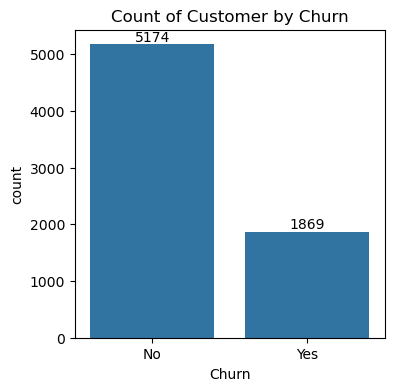

In [61]:
plt.figure(figsize = (4,4))
ax=sns.countplot(x = telco['Churn'], data = telco)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

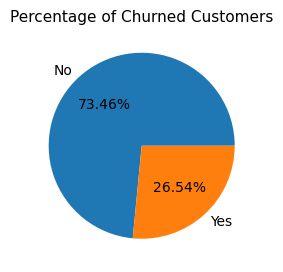

In [44]:
plt.figure(figsize=(3,4))
gb = telco.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 11)
plt.show()

#From the given pie chart we can conclude that 26.54% of our customers have churned out.

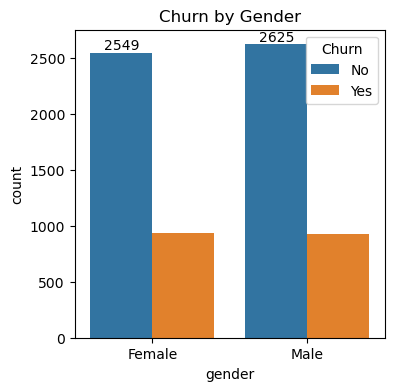

In [60]:
plt.figure(figsize = (4,4))
bx=sns.countplot(x = telco["gender"],data= telco, hue = "Churn")
bx.bar_label(bx.containers[0])
plt.title("Churn by Gender")
plt.show()

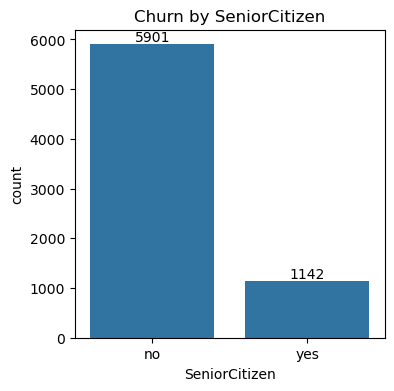

In [59]:
plt.figure(figsize = (4,4))
bx=sns.countplot(x = telco["SeniorCitizen"],data= telco)
bx.bar_label(bx.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()

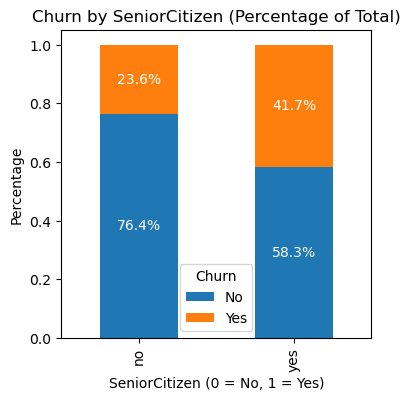

In [58]:
# Calculate the percentage of Churn for each SeniorCitizen category
churn_percent = telco.groupby(['SeniorCitizen', 'Churn']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Reset index for plotting
churn_percent = churn_percent.reset_index()

# Plot stacked bar chart
bx = churn_percent.plot.bar(stacked=True, x='SeniorCitizen', figsize=(4,4))

# Add labels to show percentage on each bar
for p in bx.patches:
    height = p.get_height()
    if height > 0:
        bx.annotate(f'{height*100:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
                    ha='center', va='center', fontsize=10, color='white')

plt.title("Churn by SeniorCitizen (Percentage of Total)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.show()

#Comparative a greater percentage of people in senior citizen category have churned.

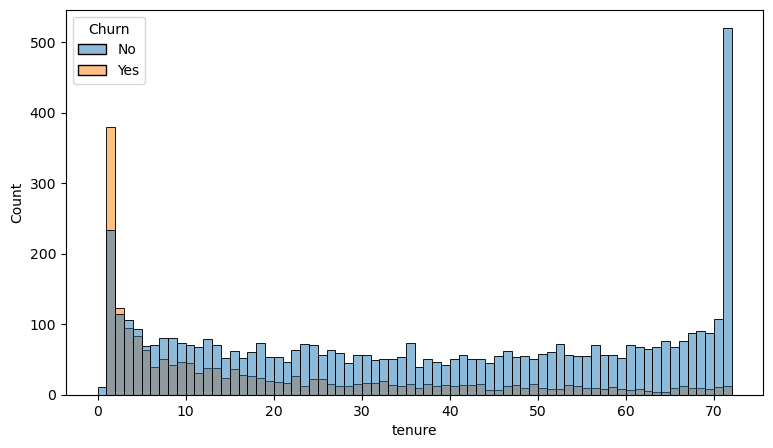

In [63]:
plt.figure(figsize = (9,5))
sns.histplot(x = "tenure", data = telco, bins = 72, hue = "Churn")
plt.show()

#People who have used our services for long time have stayed and people who have used our services 1 and 2 months have churned 

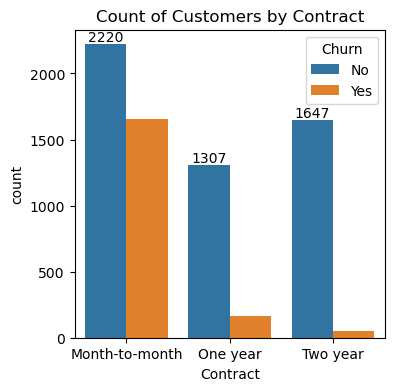

In [65]:
plt.figure(figsize = (4,4))
bx=sns.countplot(x = telco["Contract"],data= telco, hue = "Churn")
bx.bar_label(bx.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

In [66]:
telco.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

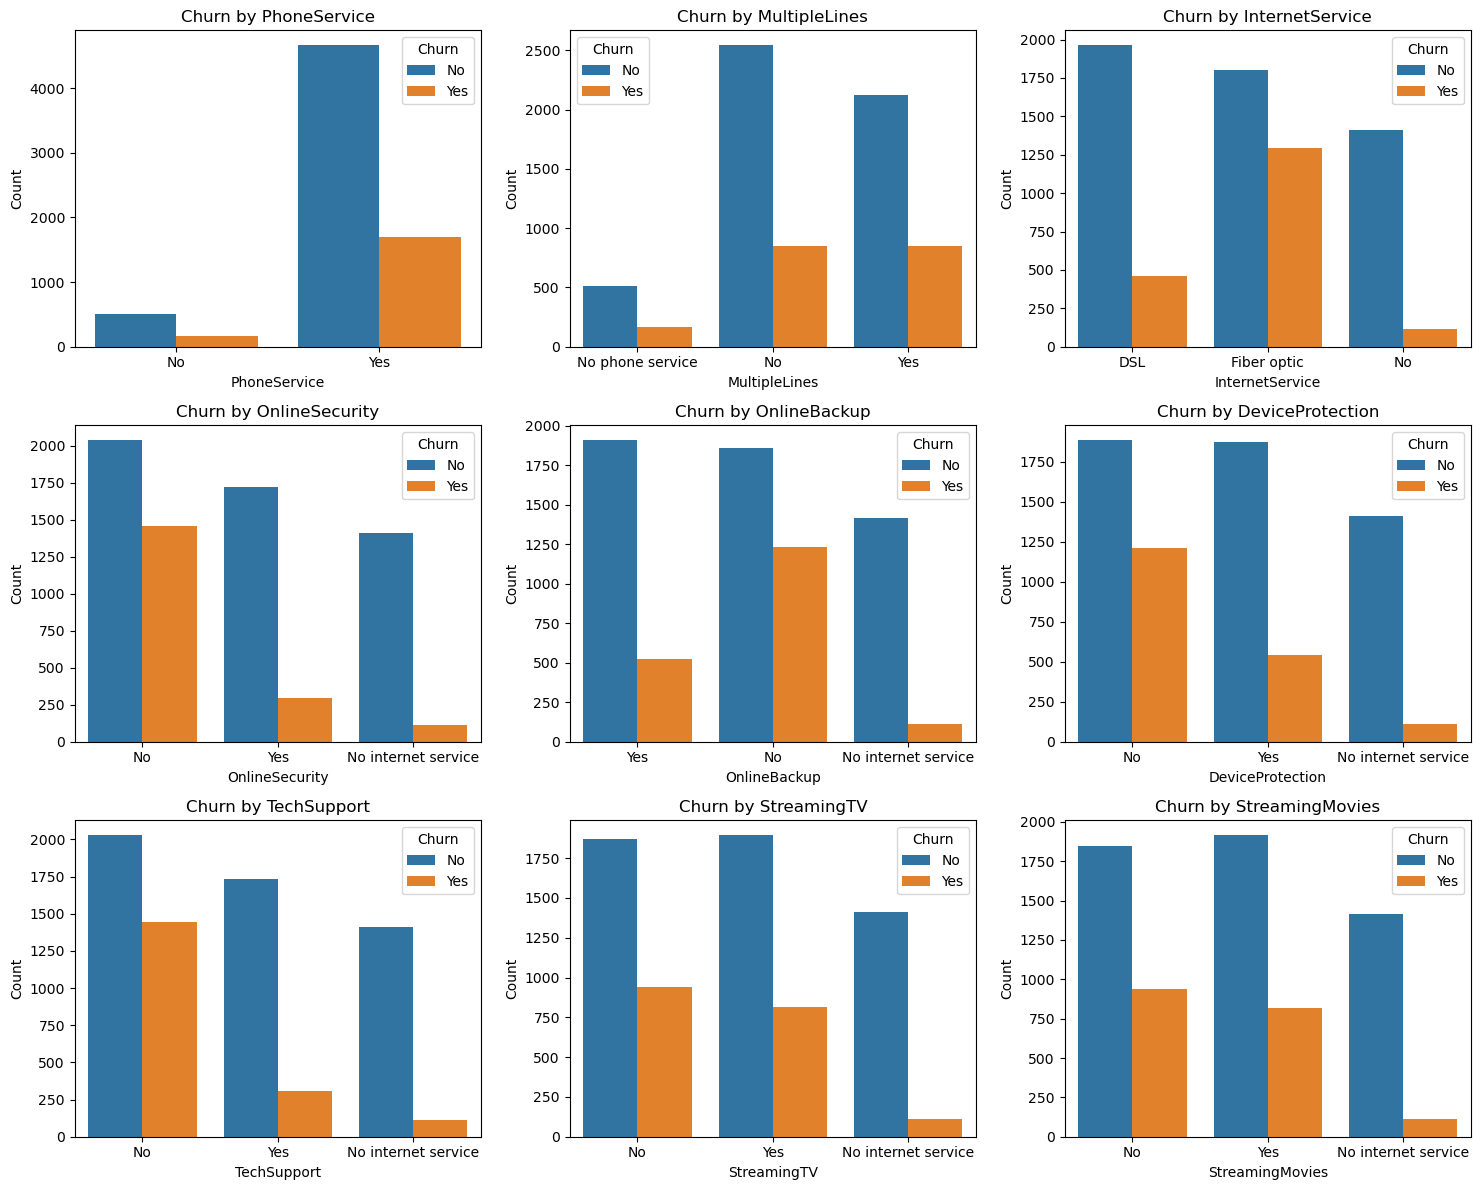

In [68]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of rows and columns for subplots
n_rows = 3  # You can adjust this based on the number of columns
n_cols = 3  # Adjust based on your preferences

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through the columns and create countplots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=telco, ax=axes[i], hue = telco["Churn"])
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

#The majority of customers who do not churn tend to have services like Phone Service, Internet Service(particularly DSL) and Online Security enabled. For services like Online Backup, Tech Support, and Streaming TV, churn rates are noticeably higher when these services are not used or are available.

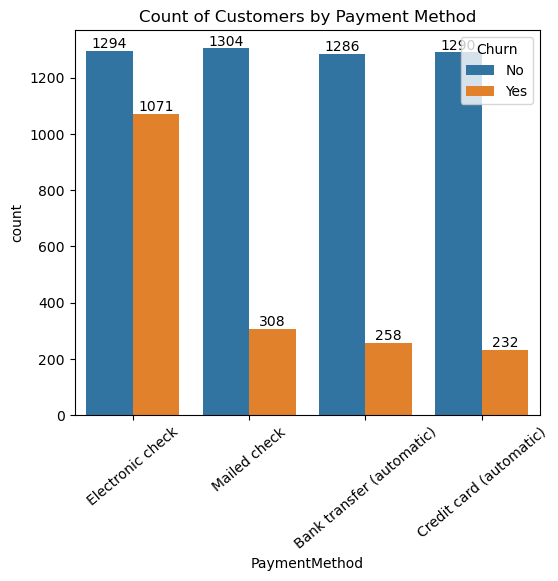

In [76]:
plt.figure(figsize = (6,5))
bx=sns.countplot(x = telco["PaymentMethod"],data= telco, hue = "Churn")
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
plt.title("Count of Customers by Payment Method")
plt.xticks(rotation = 40)
plt.show()

#Customer is likely to churn when he is using electronic check as a payment method